# Superconductivity
Devin Cunningham <br>
Partners: Max Casebolt, Alex Colbaugh

### Abstract:
In this lab, we measure the resistance of a superconductor as it is cooled to a critical temperature.

### Introduction and theoretical overview:
There are two types of superconductors. Type I superconductors form when a material is cooled to the critical temperature and the resistance of the object falls to zero. When this happens, the magnetic field is expelled from the superconductor during its transition to a superconducting state and the magnetic field lines cease to penetrate the material's surface. This effect is referred to as the Meissner effect. <br> <br>
Type II superconductors are also cooled to the critical temperature, however at a slower rate than Type I superconductors. This allows a small resistance curve which approaches zero after the critical temperature is reached. This allows for some magnetic field lines to penetrate the material. Consequently, this phenomena is what lets flux pinning (colloquially known as "quantum locking") occur. 

### Experimental Setup and Procedures:
To acquire the data in this experiment, we used a National Instruments GPIB Data Acquisition device in conjunction with a multimeter and a LabView terminal. We designed a LabView program to work with the GPIB and collect the wire resistance. Our program's serial configuration was composed of a Baud rate of 9600, an even parity, and a data bit count of 7, and a sampling rate of 250ms.

Because we were the first group to attempt this lab, the thermocoupling was not established for use and we were unable to record temperature data. However, we are able to record data withg the GPIB with our four point probe apparatus. We use a four point probe because it is effective in measuring small resistances while accounting for resistances of the leads.

We placed our probe into an insulted thermos and buried it in a stew of silicone sand crystals. After securing the thermos in a safe place, we equipped all required safety accessories and poured liquid nitrogen into the thermos. As we poured in the liquid nitrogen, we collected data with LabView and exported it into a text file to do data analysis with python.

### Experimental Data and Error Analysis:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from numpy import linspace,exp
from scipy.interpolate import UnivariateSpline, interp1d
% matplotlib inline

def beautification():
    ax.set_facecolor('whitesmoke')
    ax.patch.set_alpha(.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.minorticks_on()
    ax.tick_params('both', length=8, which='major', labelsize='10')
    ax.tick_params('both',length=3, which='minor')
    ax.grid(True, which='major', ls='dashed', alpha=.5)
    ax.grid(True, which='minor', ls='dashed', alpha=.15)
    ax.legend(loc='best')

def minimalization():
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

colors = [np.array([141,211,199])/255., np.array([190,186,218])/255., np.array([251,128,114])/255.,
          np.array([128,177,211])/255., np.array([253,180,98])/255.,
          np.array([179,222,105])/255., np.array([252,205,229])/255.,
          np.array([217,217,217])/255., np.array([188,128,189])/255.]

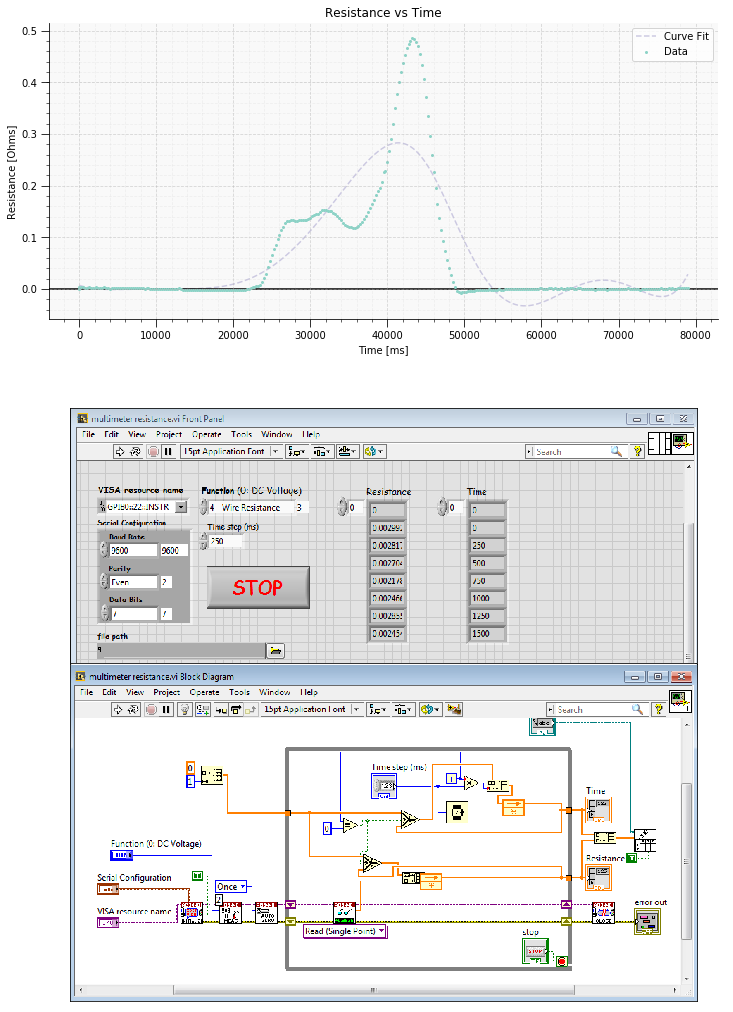

In [57]:
labview = plt.imread('superconductor_snip.PNG')
data = np.loadtxt('superconductor_run1.txt')
time = data[:,0]
resistance = data[:,1]

s = UnivariateSpline(time, resistance, k=5, s=1)
xs = linspace(min(time), max(time), 10000)
ys = s(xs)

height_ratios = [6, 12]
width_ratios = [12]
wspace = 0
hspace = 0

fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('', fontsize=20)

ax = fig.add_subplot(gs[0, 0])
ax.scatter(time,resistance, s=4, c=colors[0], label='Data')
plt.plot(xs, ys, '--', c=colors[1], alpha = .75, zorder=0, label='Curve Fit')
ax.axhline(0, color='black', zorder=0)
ax.update({'title': 'Resistance vs Time',
            'xlabel': 'Time [ms]',
            'ylabel': 'Resistance [Ohms]'})
beautification()

ax = fig.add_subplot(gs[1, 0])
ax.imshow(labview)
minimalization()

### Discussion and Conclusion:
We measured the resistance of the superconductor over time as we supercooled it with liquid nitrogen in an insulated thermos. Our data, however, reveals that the resistance increases as a function of time. We know that this is not the case--because we have created a superconductor, we know that the resistance must tend towards zero as the temperature approaches the critical temperature to become superconducting. To explain this, we believe that an error must have been made in the acquisition of the data. The small peak at 30,000ms is of interest

### References:
[1] Richard Feynman